# Numerical computations with NumPy


## Python can be slow for numerical computations

Python scripts are first compiled to byte-code.

The byte-code is then *interpreted*.

Text processing is usually as fast as in C.

Loops over large data structures might be very slow:
```Python
for i in range(len(A)):
    A[i] = ...
```    

Fortran, C and C++ compilers are good at optimizing such loops at compile time and produce very efficient assembly code (e.g. 100 times faster).

Fortunately, long loops in scripts can easily be migrated to Fortran or C.

## With NumPy, Python scripts may be fast enough

Read 100 000 (x,y) data from file and write (x,f(y)) out again

* Pure Python: 4s
* Pure Perl: 3s
* Pure Tcl: 11s
* Pure C (fscanf/fprintf): 1s
* Pure C++ (iostream): 3.6s
* Pure C++ (buffered streams): 2.5s
* Python using NumPy module: 2.2s (!)


Remark: in practice, 100 000 data points are written and read in binary format, resulting in much smaller differences

## NumPy enables efficient numerical computing in Python

Why efficient?

* Offers efficient arrays (contiguous storage) with associated array operations 
* Written in C and Fortran

NumPy is the *de facto* standard in Python,
and today even is part of interoperability with other languages (R, Julia, etc.).


## Contents

* A first taste of NumPy
* Creating arrays
* Indexing/slicing arrays
* Random numbers
* Structured arrays
* Performance considerations
* Linear algebra
* Plotting

## More info

* The NumPy quickstart (https://docs.scipy.org/doc/numpy/user/quickstart.html)
* Scientific Computing Tools for Python 
  (https://www.scipy.org)
* Scipy Lecture Notes (https://scipy-lectures.org)

## A taste of NumPy

**Task**: Fit a line through a set of (x, y) data points

In [1]:
# Only needed for Jupyter
%matplotlib inline

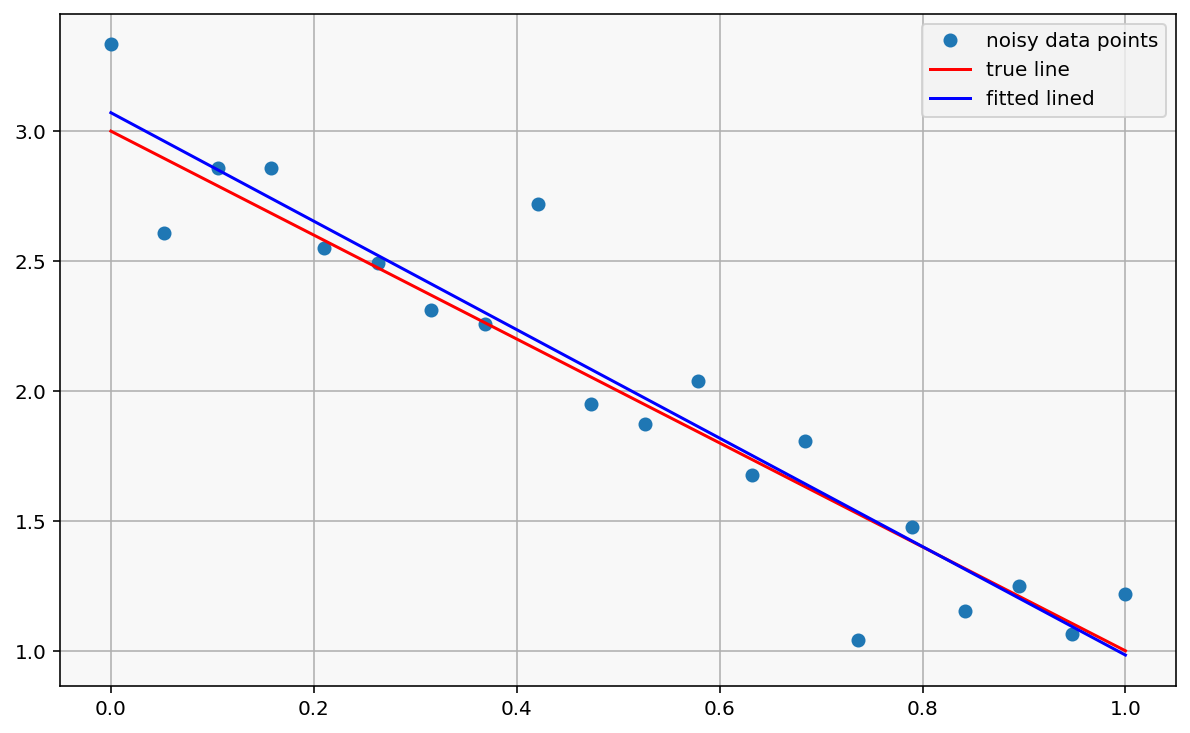

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create the x and y datapoints
N = 20
x = np.linspace(0.0, 1.0, N)  # coordinates
y_line = -2 * x + 3  # Create y values for the datapoints
y = y_line + np.random.normal(0, 0.25, N)  # add noise

# create and solve least squares system:
A = np.array([x, np.ones(N)])
A = A.transpose()
result = np.linalg.lstsq(A, y, rcond=None)

# result is a 4-tuple, the solution (a,b) is the 1st entry:
a, b = result[0]

# plot the result
plt.plot(x, y, "o", label="noisy data points")
plt.plot(x, y_line, "r", label="true line")
plt.plot(x, a * x + b, "b", label="fitted lined")

plt.legend()
plt.savefig("myplot.pdf")
plt.show()

## The example, step by step (i): Import NumPy module

Importing the `numpy` module (abbreviated as `np` for simple use):

In [3]:
import numpy as np

## The example, step by step (ii): Create noisy data

**Goal**: Create $N$ datapoints that satisfy the equation:

$$y = -2x + 3,$$

and add some white noise to the y values.

**Step 1**: Create an equivally distributed array with x coordinates:

In [4]:
# Create the x and y datapoints
N = 21                                  
x = np.linspace(0.0, 1.0, N)               # coordinates
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

**Step 2**: Generate the y data points using the equation above:

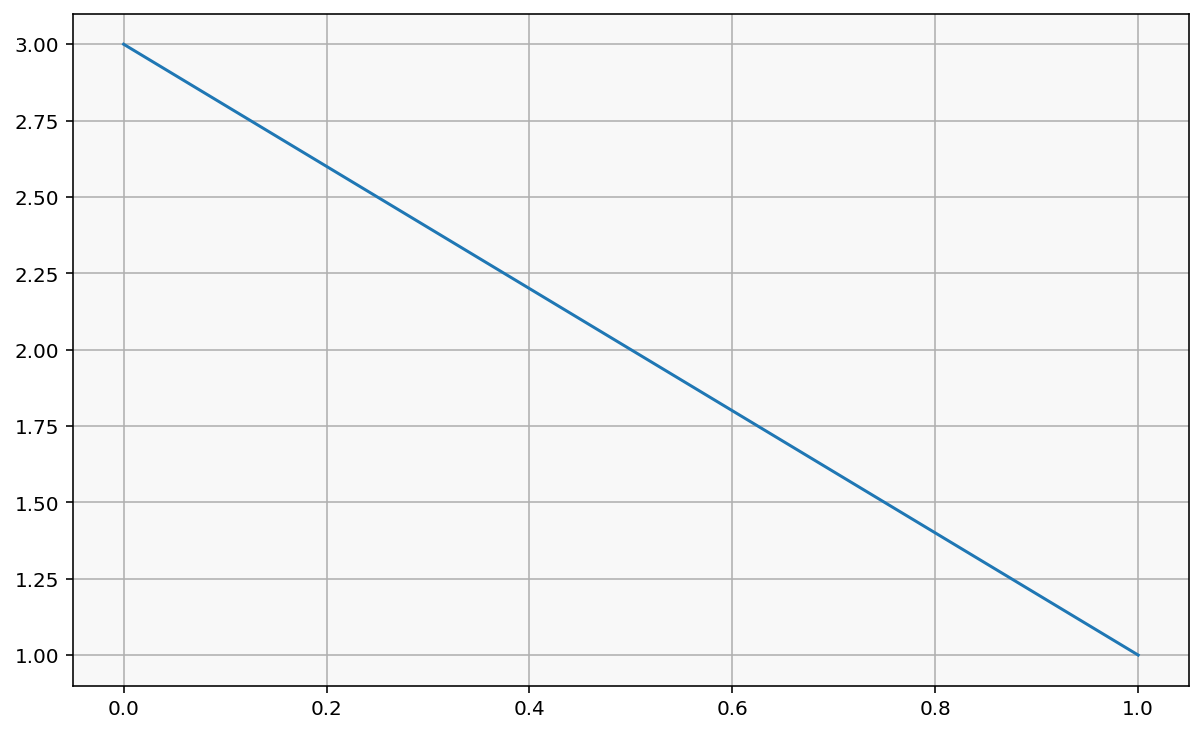

In [5]:
y_line = -2 * x + 3  # Create y values for the datapoints
plt.plot(x, y_line);

**Note**: numpy performs operation elementwise (in contrast to Python lists).

**Step 3:** Add noise:

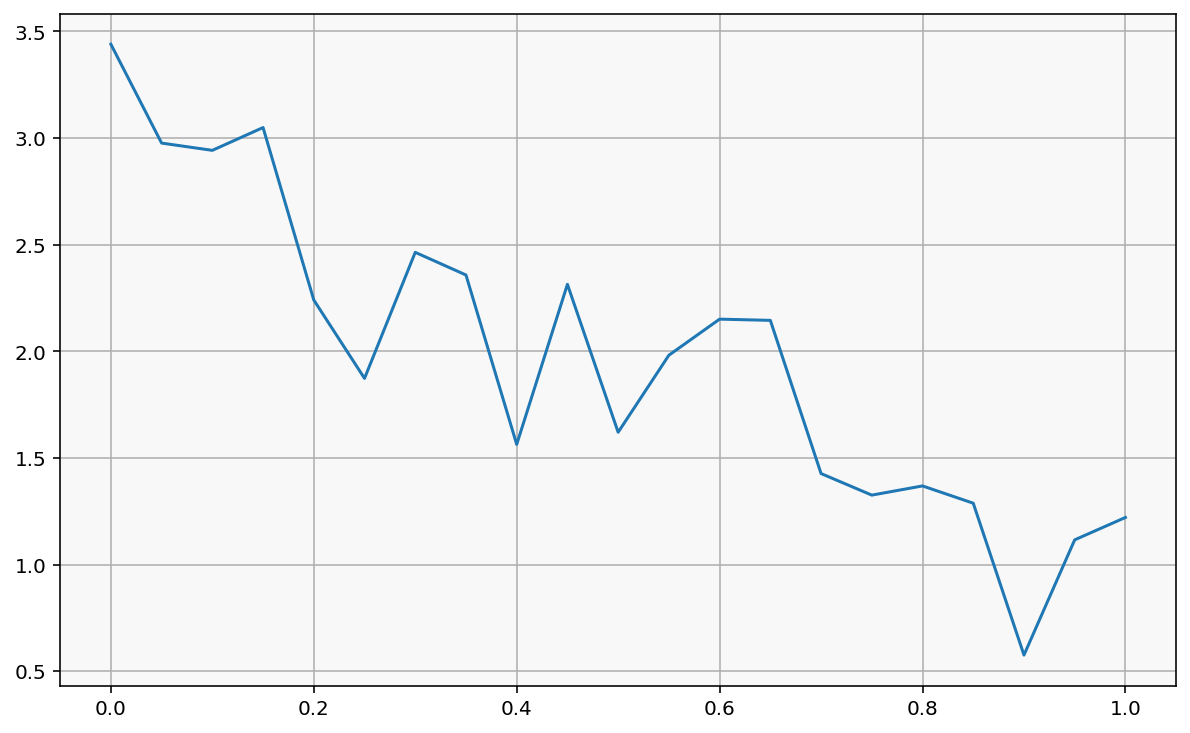

In [6]:
y = y_line + np.random.normal(0, 0.25, N)  # add noise
plt.plot(x, y);

## The example, step by step (iii): Fit the line through the data

**Task**: Identify the two line parameters $a, b$ such that

$$y \approx a x + b$$
for all x, y data points.

More precisely, we want to identify the line where the **summed squared error is minimal**:

$$\min_{a, b} \sum_{i=0}^N |y_i - ax_i - b|^2$$

numpy has a built in function for solving **least squares** problems: `numpy.linalg.lstsq`:

In [7]:
help(np.linalg.lstsq)

Help on function lstsq in module numpy.linalg:

lstsq(a, b, rcond='warn')
    Return the least-squares solution to a linear matrix equation.
    
    Computes the vector x that approximatively solves the equation
    ``a @ x = b``. The equation may be under-, well-, or over-determined
    (i.e., the number of linearly independent rows of `a` can be less than,
    equal to, or greater than its number of linearly independent columns).
    If `a` is square and of full rank, then `x` (but for round-off error)
    is the "exact" solution of the equation. Else, `x` minimizes the
    Euclidean 2-norm :math:`|| b - a x ||`.
    
    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of the `K` columns
        of `b`.
    rcond : float, optional
        Cut-off ratio for small singular values of `a`

In [8]:
A = np.array([x, np.ones(N)])
A = A.transpose()
result = np.linalg.lstsq(A, y, rcond=None)
result

(array([-2.13273875,  3.03973653]),
 array([2.24572369]),
 2,
 array([5.16319707, 1.23142031]))

In [9]:
a, b = result[0]
a, b

(-2.1327387453067277, 3.0397365322539227)

Now:
* `a` contains the steepness (gradient) of the line.
* `b` contains the offset of the line at `x=0`.

Our line approximate is therefore:
```python
 y = a * x + b
 ```
 
 The correct values are $a=-2$ and $b=3$. Let's check what we get:

In [10]:
print(f"a = {a}")
print(f"b = {b}")

a = -2.1327387453067277
b = 3.0397365322539227


## The example, step by step (iv): Plot the results

Use the [matplotlib](https://matplotlib.org) library to plot the result:

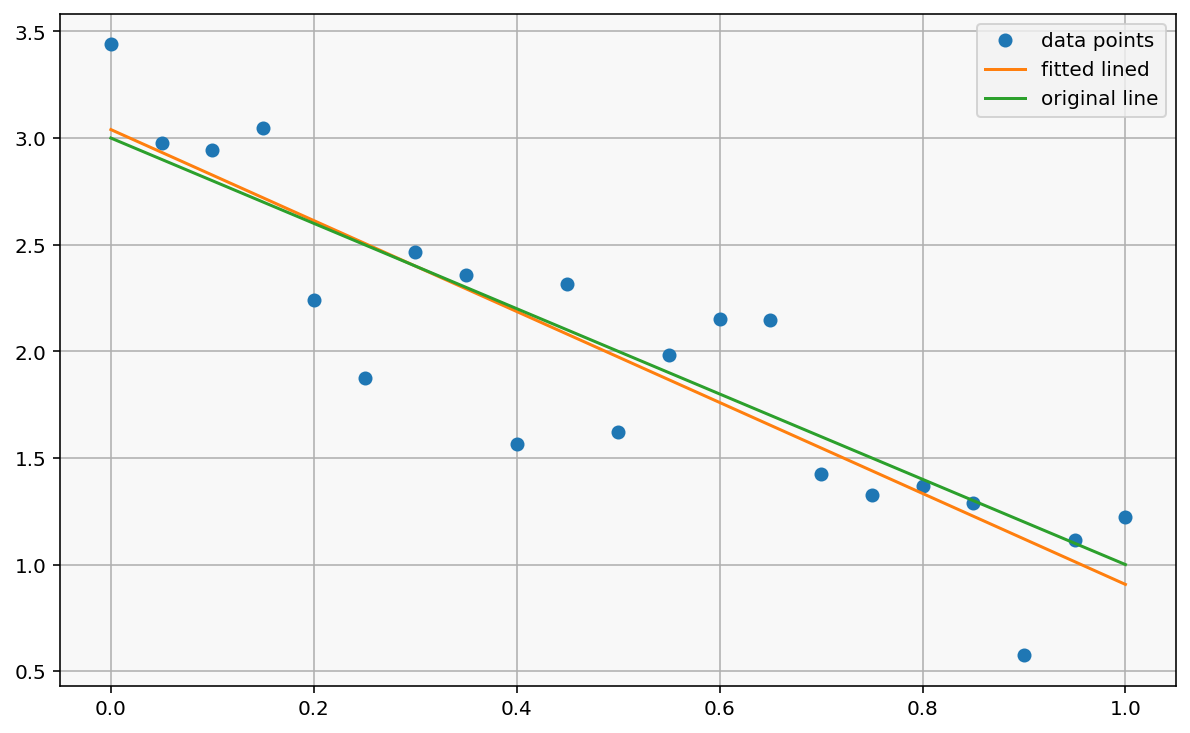

In [11]:
import matplotlib.pyplot as plt

plt.plot(x, y, "o", label="data points")
plt.plot(x, a * x + b, label="fitted lined")
plt.plot(x, y_line, label="original line")
plt.legend()
plt.show()

# Numpy arrays


The most basic array type that NumPy provides is `ndarray`. These are N-dimensional homogenous collections of "items" of the same type.

```python
np.array([5., 10., 11.])
np.array(["a", "b", "c"])
```

**Properties**:

1. Arrays have a fixed size.
2. Arrays have one associated data type. 
3. *Contents* of arrays are mutable (values in array can be changed)

## Creating NumPy arrays

Numpy provides convenience functions for creating common arrays:

In [12]:
np.zeros(3)

array([0., 0., 0.])

In [13]:
np.ones((3, 1))

array([[1.],
       [1.],
       [1.]])

In [14]:
np.empty((2, 2)) # uninitialised array. Might contain arbitrary data

array([[ 976.65      ,  616.32655257],
       [1166.15      ,  709.32655257]])

## Array with a sequence of numbers


### linspace
`linspace(a, b, n)` generates `n` uniformly spaced
coordinates, starting with `a` and ending with `b`

<img src="figs/numpy-linspace.png" style="width: 500px;"/>

Use `endpoint=False` to exclude the last point (matches `range(start, stop)`)

In [15]:
np.linspace(-3, 2, num=5)

array([-3.  , -1.75, -0.5 ,  0.75,  2.  ])

In [16]:
np.linspace(-3, 2, num=5, endpoint=False)

array([-3., -2., -1.,  0.,  1.])

### arange

`arange` is the numpy equivalent of Python's `range`

In [17]:
np.arange(-5, 6, step=2, dtype=float)

array([-5., -3., -1.,  1.,  3.,  5.])

## Warning: `arange` can give unexpected results

`arange`'s upper limit may or may not be included!

Compare this examples:

In [ ]:
np.arange(8.2, 8.2+0.05, 0.05)  # OK!

with this one:

In [ ]:
np.arange(8.2, 8.2+0.1, 0.05)   # Not OK?

**What is happening?**

**Reason**: An accumulated round-off error in the second case:

In [ ]:
8.2 + 0.05

In [ ]:
8.2 + 0.1

# Array attributes

## Important array attributes

Given an array `a`, you have access to some useful attributes:

|Attribute|Description|
|--|-------------------------------|
|*a.data* |Buffer to raw data|
|*a.dtype*|Type information of data|
|*a.ndim* |Number of dimensions|
|*a.shape*|Tuple representing rank of array in each direction|
|*a.size* |Total number of elements|
|*a.nbytes* |Total number of bytes allocated for array|

**Example**: given an array a, make a new array `x` of same dimension and data type:

In [18]:
np.zeros(A.shape, A.dtype)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [19]:
np.zeros_like(A)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

## dtypes: the type of the arrays elements

Use the `dtype` argument to create an array of a specific type:
```python
np.zeros(3, dtype=np.int)       # integer datatype
np.ones(3, dtype=np.float32)    # single precision
np.ones(3, dtype=np.float64)    # double precision
np.array(3, dtype=np.complex)   # complex numbers
```
A full list of valid types can be found [here: https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

## **By default**, numpy arrays will automatically select a suitable type to store the elements:

The type of the array is automatically determined:

Array of integers:

```python
np.array([1, 2, 3])
```

Array of floats:
```python
np.array([1.0, 2, 3]) 
```
Array of automatically converted strings:
```python
np.array([1.0, 2, "a"])  # array of strings  of dtype "<U32" (unicode strings with max 32 characters.)
```

# More constructions of numpy arrays

## Python lists and numpy arrays

### From list to array
`array(list, [datatype])` generates a numpy.array from a list:

In [20]:
mylist = [0, 1.2, 4, -9.1, 5, 8]

a = np.array(mylist)

### From array to list

In [21]:
a.tolist()

[0.0, 1.2, 4.0, -9.1, 5.0, 8.0]

## From "anything" to NumPy array

```python
asarray(a)
```

converts "any" object `a` to a NumPy array if possible/necessary, tries to avoid copying.

Works with int's, list's, tuple's, numpy.array's, ...,


**Example**: Use asarray to allow flexible arguments in functions:

In [22]:
def myfunc(some_sequence):
    a = np.asarray(some_sequence)
    return 3 * a - 5


for input_item in (
    [1, 2, 3],  # list argument
    np.zeros(10), # array
    -4.5, # float
    6, # int
):
    print(input_item, type(input_item), ":")
    print("   3 * a - 5 =", myfunc(input_item))


[1, 2, 3] <class 'list'> :
   3 * a - 5 = [-2  1  4]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] <class 'numpy.ndarray'> :
   3 * a - 5 = [-5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]
-4.5 <class 'float'> :
   3 * a - 5 = -18.5
6 <class 'int'> :
   3 * a - 5 = 13


# Higher-dimensional arrays

## Creating higher-dimensional arrays

Passing a tuple to an array constructor results in a higher-dimensional array:

In [23]:
np.zeros((2, 3, 3))     # 2*3*3 dim. array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

A two-dimensional array from two one-dimensional Python lists:

In [24]:
x = [0, 0.5, 1]
y = [-6.1, -2, 1.2]  # Python lists
np.array([x, y])        # form array with x and y as rows

array([[ 0. ,  0.5,  1. ],
       [-6.1, -2. ,  1.2]])

Numpy allows up to 32 dimensions. You can retrieve the shape of an array with

In [25]:
a = np.zeros((2, 3, 3))
a.shape

(2, 3, 3)

## Changing array dimensions

Use `reshape` to reinterpret the same data as a new shape *without copying* data:

In [26]:
a = np.array([0, 1.2, 4, -9.1, 5, 2])

In [27]:
b = a.reshape((2, 3))  # turn a into a 2x3 matrix
b

array([[ 0. ,  1.2,  4. ],
       [-9.1,  5. ,  2. ]])

The reshaped array points to the same data vector, i.e. no data is copied:

In [28]:
b[0,0]

0.0

In [29]:
b[0,0] = -10
print(f"a = {a}")
print(f"b = \n{b}")


a = [-10.    1.2   4.   -9.1   5.    2. ]
b = 
[[-10.    1.2   4. ]
 [ -9.1   5.    2. ]]


## NumPy data ordering

Numpy allows to store array in *C* or *FORTRAN* ordering:

<img src="array_ordering.svg">
**Note**: For one-dimensional arrays, the orders are equivalent.

The order can be chosen with the `order` flag:

In [ ]:
a = np.asarray([[1, 2], [3, 4]], order='F')  # Fortran order
a.flags.f_contiguous                         # Check if Fortran ordering is used

## NumPy data ordering (2)

Numpy automatically converts the ordering when necessary:

In [ ]:
A = np.array([[1, 2], [3, 4]], order="C")
B = np.array([[1, 2], [3, 4]], order="F")
print(A + B)

Transposing a matrix is perfomed by swapping the ordering (without data copying):

In [ ]:
A.transpose().flags.f_contiguous

# Array indexing

## Basic indexing

The indicing syntax that we are know from list's also work for array's.

### Getting values
Slicing:
```python
a[1:4]           # Get 2nd to 4th element
```
Fancy indexing:
```python
a[[0, 2, 3]]     # Get entries 0, 2 and 3
```
**Important**: Slicing returns a *view* to the original array, i.e. no data is copied. Fancy indexing always returns a copy of the array.

### Setting values
```python
a[2:4] = -1      # set a[2] and a[3] equal to -1
a[-1]  = a[0]    # set last equal to first element
a[:]   = 0       # set all elements of a equal to 0
```

## Multi-dimensional indexing

Multi-dimensional indexing has the same syntax as with list's:
```python
a = ones([2, 3]) # create a 2x3 matrix 
                 # (two rows, three columns)

a[1,2] = 10      # set element (1,2) (2nd row, 3rd column)
a[1][2] = 10     # equivalent syntax (slower)
a[:,2] = 10      # set all elements in 3rd column
a[1,:] = 10      # set all elements in 2nd row
a[:,:] = 10       # set all elements 
```

## Example: extracting sub-matrices with slicing

Given this matrix:

In [30]:
a = np.linspace(0, 29, 30).reshape(5, 6)
print(a)

[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]
 [24. 25. 26. 27. 28. 29.]]


we can use slicing to get a *view* of a subset of this matrix.
For example to get the submatrix consisting of row 2 and 3 and every second column, we could use:

In [31]:
a[1:3, ::2] = 0  # a[i,j] for i=1,2 and j=0,2,4
a

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 0.,  7.,  0.,  9.,  0., 11.],
       [ 0., 13.,  0., 15.,  0., 17.],
       [18., 19., 20., 21., 22., 23.],
       [24., 25., 26., 27., 28., 29.]])

To get the submatrix consisting of every 3rd row, and every second column starting from the third column, we would use:

In [32]:
a[::3, 2::2]  # a[i,j] for i=0,3 and j=2,4

array([[ 2.,  4.],
       [20., 22.]])

## Slices create *views* of array data

Assigning to a sliced array will change the original array:

In [33]:
a = np.ones([3, 2])
b = a[2, :]  # get a view onto the 3rd row
b[0] = np.pi  # assigning to b is reflected in a!
print(a)

[[1.         1.        ]
 [1.         1.        ]
 [3.14159265 1.        ]]


To avoid referencing via slices (if needed) use copy:
```python
b = a[2,:].copy()  # b has its own vector structure
```

**Note**: This behaviour is different to Python `lists`, where `a[:]` makes always a copy

# Loops


## Loops over arrays using indices

If we know the dimension of the array, we can use a nested loop to iterate over all array elements:


In [34]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        a[i, j] = (i + 1) * (j + 1) * (j + 2)
        print(f"a[{i}, {j}] = {a[i, j]}")
    print()  # empty line after each row

a[0, 0] = 2.0
a[0, 1] = 6.0

a[1, 0] = 4.0
a[1, 1] = 12.0

a[2, 0] = 6.0
a[2, 1] = 18.0



* Is there a more *Pythonic* way?
* What if we do not know the dimension of the array?

## Better: Use standard Python loops

A standard for loop iterates over the first index. 

**Example:** Looping over each element in a matrix:
```python
for row in a:
    for element in row:
         my_func(element)
```

## For unknown dimensions loop over the flattened array

View array as one-dimensional and iterate over all elements:
```python
for element in a.ravel():
    my_func(element)
```
ravel() returns a *flattened array*, (1D version). Might return a copy if necessary. 

**Advice**: Use `ravel()` only when reading elements, for assigning it is better to use `shape` or `reshape`.

# Numpy Array computations

## Arithmetic operations

Arithmetic operations can be used with arrays:

In [35]:
import numpy as np

a = np.linspace(0, 10, 11)

b = 3 * a - 1
c = np.sin(b)
d = np.exp(c)

print(b)

[-1.  2.  5.  8. 11. 14. 17. 20. 23. 26. 29.]


**Note**: most arithmetic operations in numpy are performed **elementwise**.

## Array operations are much faster than element-wise operations

Let's compare the array versus element-wise operation on a 10 million large array.

#### Element wise implementation

In [36]:
%%time
import numpy as np

a = np.linspace(0, 1, int(1e07))  # create a large array

b = np.empty_like(a)
for i in range(a.size):
    b[i] = 3 * a[i] - 1

CPU times: user 9.14 s, sys: 194 ms, total: 9.33 s
Wall time: 10.4 s


Runtime ca 10 seconds.

#### Implementation with array operations

In [37]:
%time b = 3 * a - 1

CPU times: user 53.5 ms, sys: 52.8 ms, total: 106 ms
Wall time: 123 ms


Runtime ca 0.1 seconds!

A ca. 100x speed-up!

# Vectorization user-defined functions

Imagine you have implemented your own function and would like to apply it to all elements in an array:

In [ ]:
a = np.linspace(-1, 1, 1000000)


def myfunc(x):
    if x > 0:
        return 0
    else:
        return x ** 2


myfunc(a)  # ??

**Problem**: myfunc operates on the entire array instead of elementwise operations.

# Potential solution to vectorization user-defined functions

Loop over each array element and call myfunc 

In [ ]:
%%time
out = np.empty(len(a))

for i, ele in np.ndenumerate(a):
    out[i] = myfunc(ele) 

Runtime ca 1.3 s

**This is slow**!

# Better solution

Convert myfunc to a *vectorized* function: 

In [ ]:
%%time
vfunc = np.vectorize(myfunc)
out2 = vfunc(a)          

Runtime ca 0.3 s

**Much faster**! 

# Plotting with matplotlib

Matplotlib is the most popular package in SciPy for creating publication quality figures. The easiest way to use matplotlib is to import the submodule "pyplot".

## Learning resources

* [Matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib) by Nicolas P. Rougier
* [The Matplotlib Gallery:](http://matplotlib.org/gallery.html)

<center>
<img src="matplotlib_gallery.png" style="width: 800px;"/>
</center>


# A simple plot


Plotting one, or multiple sets of data is done with:

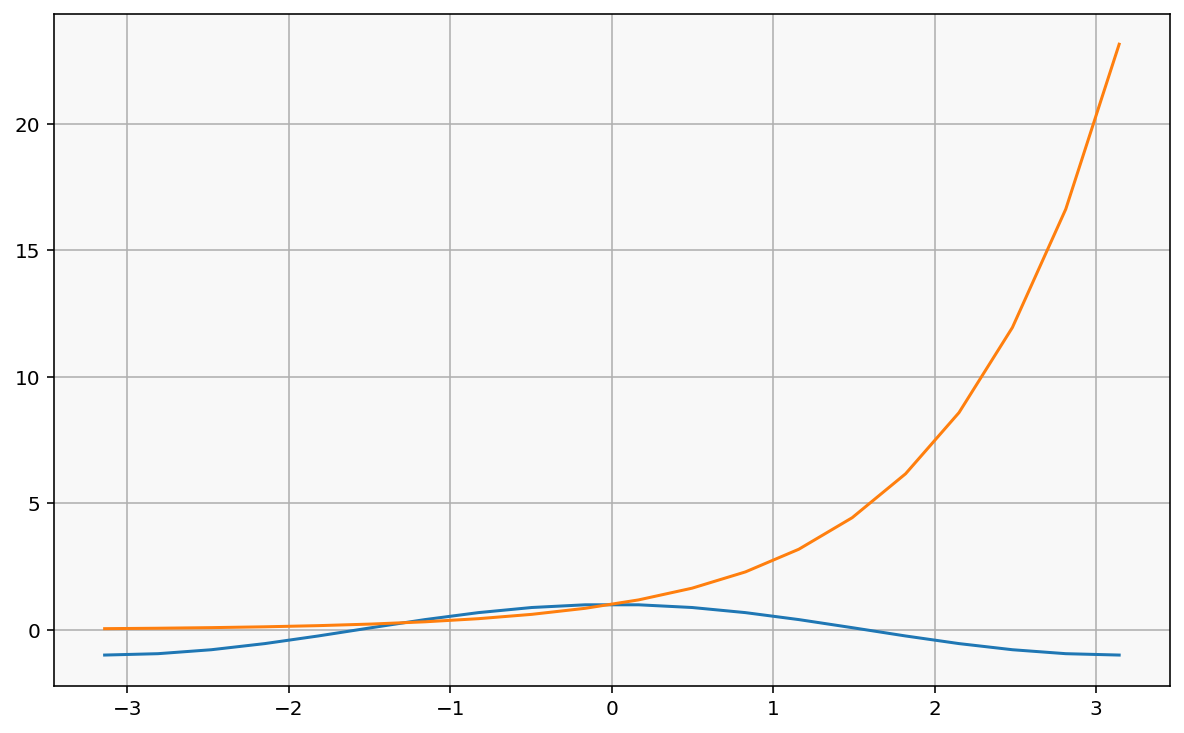

In [38]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-np.pi, np.pi, 20, endpoint=True)
Y = np.cos(X)
Z = np.exp(X)

plt.plot(X, Y)
plt.plot(X, Z)

# Adjusting your plot


Typical adjustments:
* Change line color, thickness, type
* Change axis settings
* Add labels, legends
* ...

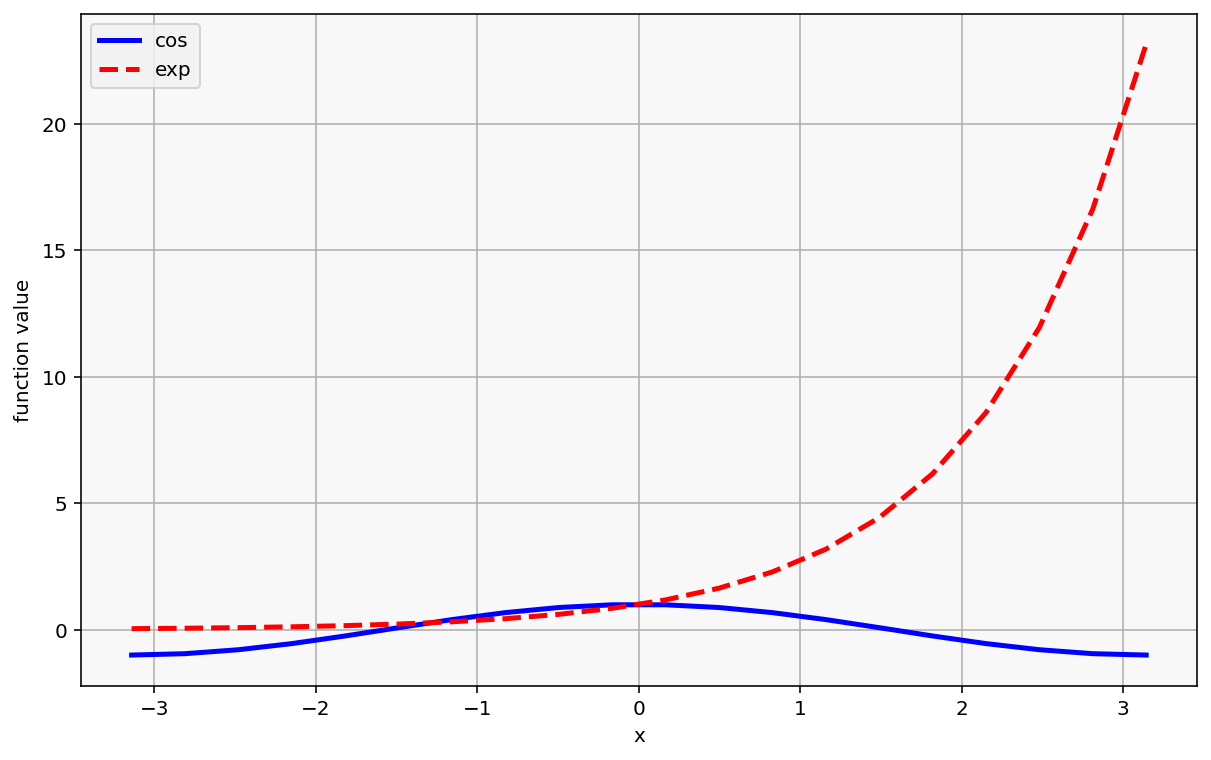

In [39]:
plt.plot(
    X, Y, label="cos", color="blue", linewidth=2.5, linestyle="-"
)  # Add labels for the legend
plt.plot(X, Z, label="exp", color="red", linewidth=2.5, linestyle="--")

plt.xlabel("x")  # Add labels for the axis
plt.ylabel("function value")  # Add labels for the axis

plt.legend(loc=0)
plt.savefig("file.pdf") # save to files for use in papers, etc.

# Other types of plots

|Function name|Plot type|
|--|-------------------------------|
|*pyplot.scatter* |Scatter plot|
|*pyplot.bar* |Bar plot|
|*pyplot.counturf* |Contour plot|
|*pyplot.imshow* |Showing images (on grids)|
|*pyplot.pie* | Pie charts |
|*pyplot.plot_surface* | 3D charts |

## Example of a scatter plot

(-3.141592653589793, 3.141592653589793)

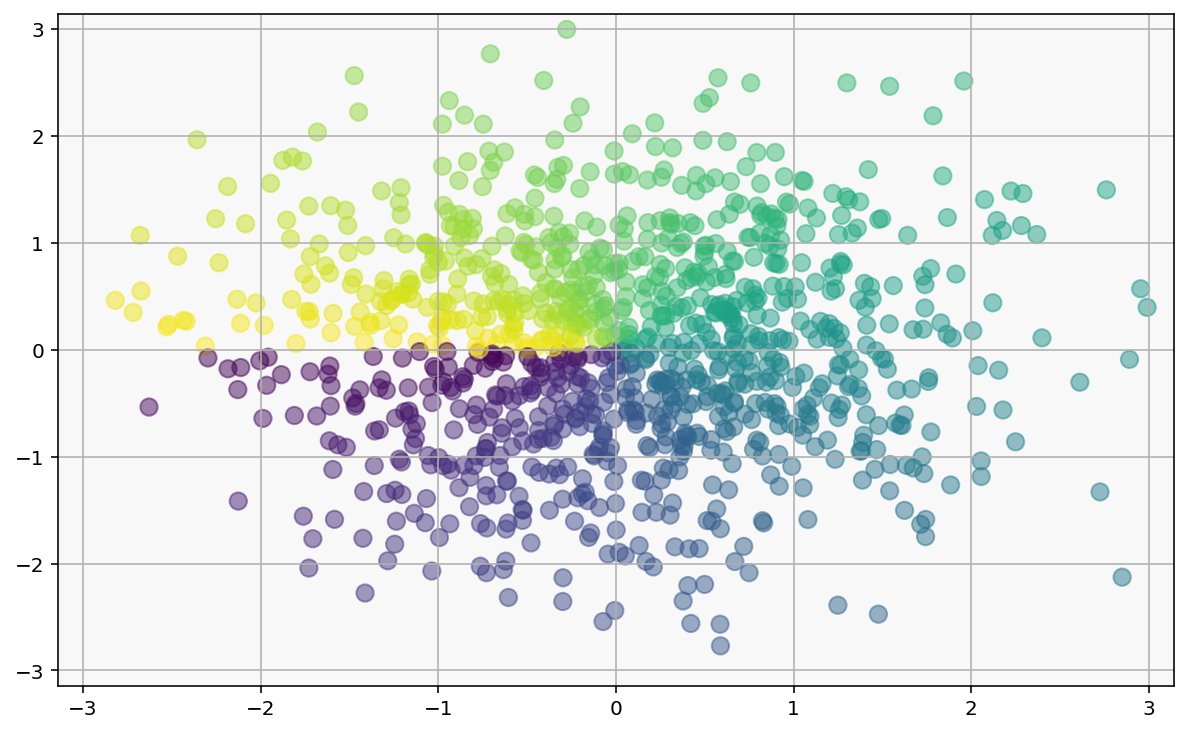

In [41]:
n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)

plt.scatter(X, Y, s=75, c=T, alpha=0.5);
plt.xlim([-np.pi, np.pi])
plt.ylim([-np.pi, np.pi])

## Plotting a function of x
To start trying out plotting, let's first define a function to plot:
$$ f(x) = (x - 3) (x - 5) (x - 7) + 85 $$

In [42]:
def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85

Next, we plot this function on $  \ x \in [0, 10] $

In [43]:
import numpy as np

# Calculate plot points:
x = np.linspace(0, 10)

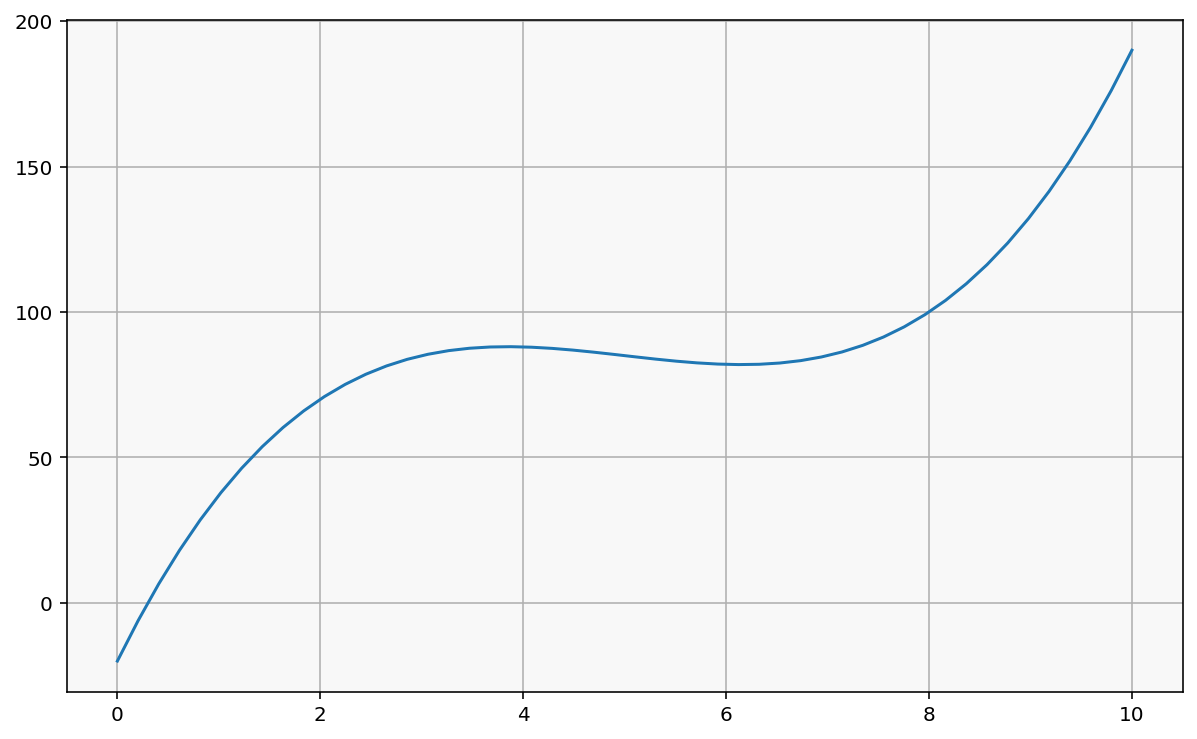

In [44]:
# Evaluate the function at the plot points
y = func(x)

# Plot graph defined by x/y points
plt.plot(x, y)